# Análise Exploratória de Dados Ambientais

Este notebook realiza uma análise exploratória de dados ambientais, incluindo:
- **Focos de queimadas**: Dados anuais de focos de queimadas fornecidos pelo INPE.
- **Dados meteorológicos**: Informações climáticas de diferentes localidades.
- **Dados geoespaciais**: Informações sobre áreas indígenas, estados e municípios.

O objetivo é identificar padrões, tendências e possíveis correlações entre os dados para apoiar estudos ambientais e tomadas de decisão.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# --- **Carregamento de Todos os Dataframes Tratados** ---
___

In [2]:
# Carregando todos os dataframes tratados do projeto

#_________________________________ FOCOS DE QUEIMADAS _____________________________________#

# Dataframe Foco de Queimadas ano  2019
df_foc_queimadas_2019       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2019_20250406.csv', sep=',', header=0)
# Dataframe Foco de Queimadas ano  2020
df_foc_queimadas_2020       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2020_20250406.csv', sep=',', header=0)
# Dataframe Foco de Queimadas ano  2021
df_foc_queimadas_2021       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2021_20250406.csv', sep=',', header=0)
# Dataframe Foco de Queimadas ano  2022
df_foc_queimadas_2022       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2022_20250406.csv', sep=',', header=0)
# Dataframe Foco de Queimadas ano  2023
df_foc_queimadas_2023       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2023_20250406.csv', sep=',', header=0)
#  Dataframe Foco de Queimadas ano  2024
df_foc_queimadas_2024       = pd.read_csv('../data/processados/tratados/focos_tratados-df_foc_queimadas_2024_20250406.csv', sep=',', header=0)



#_________________________________ FOCOS DE QUEIMADAS AMS (BIÔMA AMAZÔNICO) _____________________________________#

# Dataframe Foco de Queimadas AMS ano  2023
df_foc_queimadas_ams_2023 = pd.read_csv('../data/processados/tratados/focos_tratados-df_focus_ams_2023_brasil_ro_20250406.csv', sep=',', header=0)
# Dataframe Foco de Queimadas AMS ano  2024
df_foc_queimadas_ams_2024 = pd.read_csv('../data/processados/tratados/focos_tratados-df_focus_ams_2024_ro_20250406.csv', sep=',', header=0)


#_________________________________ MAPEAMENTO MUNICÍPIOS RONDÔNIA  _____________________________________#

# Dataframe Mapeamento Municípios de Rondônia
df_map_muni_ro = pd.read_csv('../data/processados/tratados/df_map_municipios_ro_20250406.csv', sep=',', header=0)



#_________________________________ ÁREAS INDÍGENAS - RONDÔNIA  _____________________________________#

# Dataframe Área Indígena Rondônia ano  2023
df_geo_area_indigena = pd.read_csv('../data/processados/tratados/df_geo_area_indigena_20250406.csv', sep=',', header=0)


#_________________________________ DADOS METEOROLÓGICOS MUNICÍPIOS RONDÔNIA  _____________________________________#

# Dataframe Dados Meteorológicos Municípios de Rondônia ano  2024
df_dados_met_ariquemes_2024         = pd.read_csv('../data/processados/tratados/focos_tratados-df_dados_met_ariquemes_2024_20250406.csv', sep=',', header=0)
df_dados_met_cacoal_2024            = pd.read_csv('../data/processados/tratados/focos_tratados-df_dados_met_cacoal_2024_20250406.csv', sep=',', header=0)
df_dados_met_pvh_2024               = pd.read_csv('../data/processados/tratados/focos_tratados-df_dados_met_pvh_2024_20250406.csv', sep=',', header=0)
df_dados_met_vilhena_2024           = pd.read_csv('../data/processados/tratados/focos_tratados-df_dados_met_vilhena_2024_20250406.csv', sep=',', header=0)


#_________________________________ UNIDADES DE ATENDIMENTO CORPO DE BOMBEIROS RONDÔNIA  _____________________________________#

# Dataframe Unidades de Atendimento Corpo de Bombeiros Rondônia ano 2024
df_unid_local_bomb = pd.read_csv('../data/processados/tratados/focos_tratados-df_unid_local_bomb_20250406.csv', sep=',', header=0)


# --- **Análise Temporal de Focos de Queimadas** ---
___

### Tendência Anual (2019–2024)

### Conversão de Tipos

In [3]:
df_foc_queimadas_2019['data'] = pd.to_datetime(df_foc_queimadas_2019['data_pas'], errors='coerce')
df_foc_queimadas_2019.drop(columns=['data_pas'], inplace=True)


### Checar valores únicos por coluna

In [4]:
for col in ['pais', 'estado', 'municipio', 'bioma']:
    print(f"Valores únicos em {col}:")
    print(df_foc_queimadas_2019[col].value_counts())
    print('-'*50)


Valores únicos em pais:
pais
Brasil    11230
Name: count, dtype: int64
--------------------------------------------------
Valores únicos em estado:
estado
RONDÔNIA    11230
Name: count, dtype: int64
--------------------------------------------------
Valores únicos em municipio:
municipio
PORTO VELHO                  3585
NOVA MAMORÉ                  1230
CUJUBIM                       896
CANDEIAS DO JAMARI            866
MACHADINHO D'OESTE            616
BURITIS                       369
VILHENA                       323
ALTO PARAÍSO                  314
GUAJARÁ-MIRIM                 266
PIMENTA BUENO                 226
ARIQUEMES                     213
SERINGUEIRAS                  197
SÃO FRANCISCO DO GUAPORÉ      177
ALTA FLORESTA D'OESTE         167
COSTA MARQUES                 132
CHUPINGUAIA                   121
SÃO MIGUEL DO GUAPORÉ         113
MONTE NEGRO                   108
RIO CRESPO                    100
OURO PRETO DO OESTE            99
CAMPO NOVO DE RONDÔNIA         

### Verificar geolocalização
Verifica se há coordenadas fora da área do estado (por exemplo, pontos fora de Rondônia).

In [5]:
# Exemplo para Rondônia: lat entre -14 e -7 / lon entre -66 e -59
df_foc_queimadas_2019.query('lat < -14 or lat > -7 or lon < -66 or lon > -59')


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma,data
124,1329808489,39a11e0d-edf0-3db8-b14f-d5cce16fbaab,-9.755,-66.633,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-08-17 18:35:00
336,1120336281,08192de3-f6d8-3074-b5a3-89831ddf9a9d,-9.754,-66.592,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-06-18 18:10:00
337,1120336280,6dc01a0f-3d80-3c61-b26c-3766c258afbe,-9.756,-66.601,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-06-18 18:10:00
695,1229303240,6f0f27ae-8c8e-350c-804f-cf8efc41dda7,-9.532,-66.375,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-07-24 17:45:00
1620,1292366943,27b2510c-fc8e-31de-8266-21233c427a41,-9.577,-66.416,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-08-09 17:45:00
...,...,...,...,...,...,...,...,...,...
10788,1408147567,e4c74cd5-9435-384b-a23e-f37fe132c4f0,-9.564,-66.220,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-11-04 17:50:00
10819,1408147211,6a350ac8-f576-3489-ade2-5c23f87227a0,-9.687,-66.145,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-11-04 17:50:00
10849,1408146980,d5add5ec-fb79-348f-944b-cc0c92e182ba,-9.563,-66.209,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-11-04 17:50:00
10980,1408702392,cd32c27b-ea1e-38af-9cba-f4e3757c0175,-9.758,-66.616,Brasil,RONDÔNIA,PORTO VELHO,Amazônia,2019-11-11 18:00:00


## **Gráficos EDA - Focos por Mês**


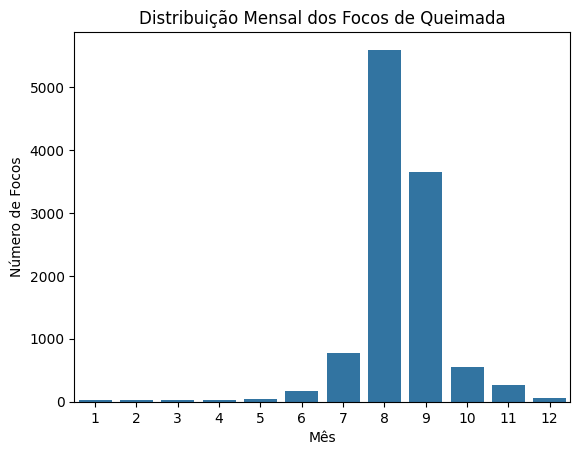

In [6]:
df_foc_queimadas_2019['mes'] = df_foc_queimadas_2019['data'].dt.month
df_foc_queimadas_2019['ano'] = df_foc_queimadas_2019['data'].dt.year

sns.countplot(data=df_foc_queimadas_2019, x='mes', order=range(1, 13))
plt.title('Distribuição Mensal dos Focos de Queimada')
plt.xlabel('Mês')
plt.ylabel('Número de Focos')
plt.show()


### Top municípios com mais focos de poluição

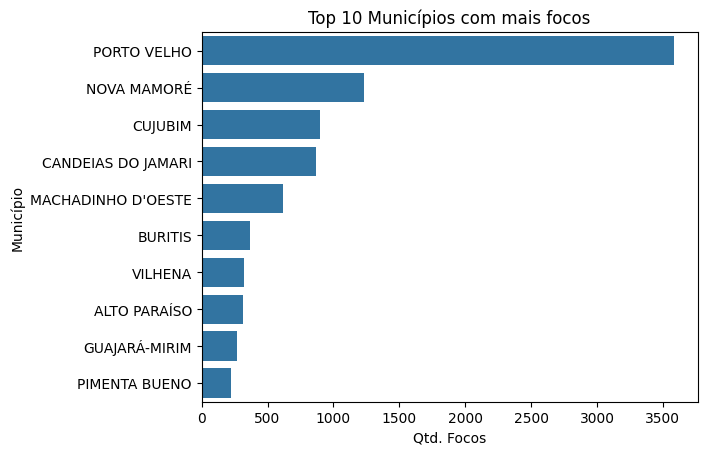

In [7]:
top_mun = df_foc_queimadas_2019['municipio'].value_counts().head(10)

sns.barplot(x=top_mun.values, y=top_mun.index)
plt.title('Top 10 Municípios com mais focos')
plt.xlabel('Qtd. Focos')
plt.ylabel('Município')
plt.show()


### Distribuição espacial (Folium básico)

In [8]:
import folium

m = folium.Map(location=[-10.9, -63.1], zoom_start=6)
for i, row in df_foc_queimadas_2019.head(500).iterrows():  # evita travar com milhares de pontos
    folium.CircleMarker(location=[row['lat'], row['lon']],
                        radius=2,
                        color='red',
                        fill=True).add_to(m)

m.save('../scripts/html/mapa_focos_2024.html')


### 🌟 Exemplo Estendido: Com Tooltip e Popup

In [9]:
import folium

m = folium.Map(location=[-10.9, -63.1], zoom_start=8)
for i, row in df_foc_queimadas_2019.head(500).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['municipio']} - {row['data'].strftime('%d/%m/%Y')}",
        tooltip=row['municipio']
    ).add_to(m)


m.save('../scripts/html/mapa_focos_tooltip_pop_2024.html')


### 🔥📈 Plot: Evolução Anual dos focos de Queimadas em Rondônia (2019-2024)

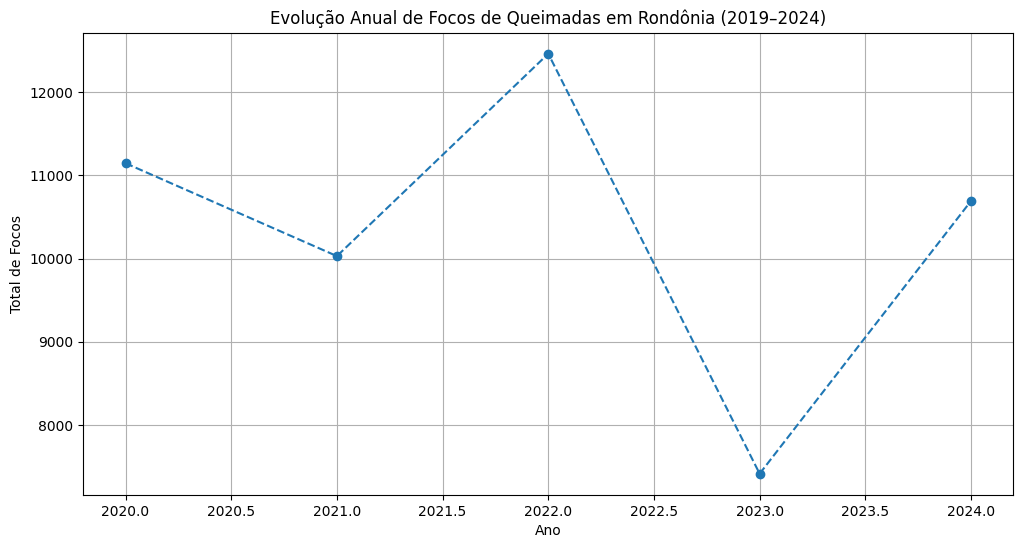

In [10]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# Concatena todos os dataframes
df_focos_total = pd.concat([
    df_foc_queimadas_2019,
    df_foc_queimadas_2020,
    df_foc_queimadas_2021,
    df_foc_queimadas_2022,
    df_foc_queimadas_2023,
    df_foc_queimadas_2024
])

# Corrige o tipo da coluna 'data_pas' para datetime
df_focos_total['data_pas'] = pd.to_datetime(df_focos_total['data_pas'], errors='coerce')

# Remove possíveis linhas com datas nulas
df_focos_total = df_focos_total.dropna(subset=['data_pas'])

# Agrega por ano
focos_por_ano = df_focos_total.groupby(df_focos_total['data_pas'].dt.year).size().reset_index(name='total')

# 📈 Plotagem de linha
plt.figure(figsize=(12, 6))
plt.plot(focos_por_ano['data_pas'], focos_por_ano['total'], marker='o', linestyle='--')
plt.title('Evolução Anual de Focos de Queimadas em Rondônia (2019–2024)')
plt.xlabel('Ano')
plt.ylabel('Total de Focos')
plt.grid(True)
plt.show()


### 🌍📈 Mapa Folium com todos os dados de 2019 a 2024

In [11]:
# Mapa base centralizado em Rondônia
m_total = folium.Map(location=[-10.9, -63.1], zoom_start=6)

# Adiciona até 1000 focos para evitar travamento
for i, row in df_focos_total.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6,
        tooltip=f"{row['municipio']} | {row['data_pas'].date()} | {row['bioma']}"
    ).add_to(m_total)

# Exibe mensagem de conclusão
if m_total:
    # Salva o HTML
    m_total.save('../scripts/html/mapa_focos_total_2019_2024.html')  
    print(f"Mapa salvo com sucesso em: {os.path.abspath('../scripts/html/mapa_focos_tooltip_pop_2024.html')}")          
else:
    print("Ocorreu um erro ao salvar o mapa.")


Mapa salvo com sucesso em: c:\__DEV\Python\Streamlit\sentinela-ambiental\scripts\html\mapa_focos_tooltip_pop_2024.html
